### 問題：我是一個汽車銷售員，我想要透過顧客年齡以及薪水，判斷顧客是否會買車
- [資料集](https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset)

# Environment

In [ ]:
# HappyML install
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

In [ ]:
# Load data
datasetName="car_data.csv"
datasetName = datasetName.replace(" ", "%20")
if not os.path.isfile(datasetName):
  os.system("wget https://raw.githubusercontent.com/StanOWO/1131_NTUAI_ML_Resource/main/dataset/" + datasetName)

# Preprocessing

In [ ]:
import HappyML.preprocessor as pp

In [ ]:
# Read CSV file
dataset = pp.dataset(file="car_data.csv")

In [ ]:
# Decomposition the dataset into Independent & Dependent Variables
X, Y = pp.decomposition(dataset, x_columns=[2,3], y_columns=[4])

In [ ]:
# Missing Data
X = pp.missing_data(X, strategy="mean")
Y = pp.missing_data(Y, strategy="mean")

In [ ]:
# Split Training & Testing set
X_train, X_test, Y_train, Y_test = pp.split_train_test(X, Y, train_size=0.8, random_state=0)

In [ ]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler().fit(X_train)
# X_train = sc_X.transform(X_train)
# X_test = sc_X.transform(X_test)
X_train, X_test = pp.feature_scaling(fit_ary=X_train, transform_arys=(X_train, X_test))

# Model(Logistic Regression)

In [ ]:
from HappyML.regression import LogisticRegressor
model = LogisticRegressor()
Y_pred = model.fit(X_train, Y_train).predict(X_test)

# Performance

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# print("Confusion Matrix:\n", confusion_matrix(y_true=Y_test, y_pred=Y_pred))
# print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2%}")

from HappyML.performance import ClassificationPerformance

pfm = ClassificationPerformance(Y_test, Y_pred)
print("Confusion Matrix:\n", pfm.confusion_matrix())
print(f"Accuracy: {pfm.accuracy():.2%}")

Confusion Matrix:
 [[113   8]
 [ 20  59]]
Accuracy: 86.00%
Recall: 84.04%
Precision: 86.51%


# Visualization

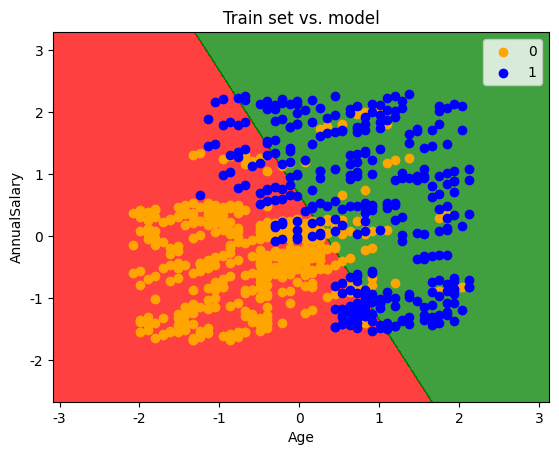

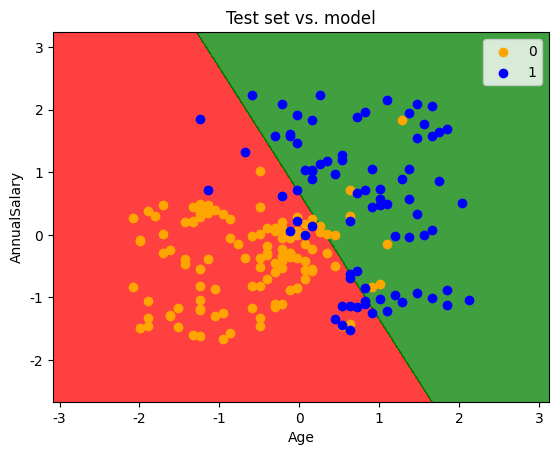

In [ ]:
import HappyML.model_drawer as md

md.classify_result(x=X_train, y=Y_train, classifier=model.regressor,
                   title="Train set vs. model", font="DejaVu Sans")
md.classify_result(x=X_test, y=Y_test, classifier=model.regressor,
                   title="Test set vs. model", font="DejaVu Sans")